In [1]:
https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/articles/overviewoftheukpopulation/january2021

SyntaxError: invalid syntax (<ipython-input-1-e4347ddcaede>, line 1)

In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
dfd = pd.read_csv('../data/first_dose.csv')
dsd = pd.read_csv('../data/second_dose.csv')
dtd = pd.read_csv('../data/total_doses.csv')
dpop = pd.read_csv('../data/uk_population.csv')

In [6]:
dframes = [dfd, dsd, dtd]
for i in dframes:
    display(i.head(3))
    print("----")

,areaType,areaName,areaCode,date,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate
0,overview,United Kingdom,K02000001,2021-04-08,96242.0,31903366
1,overview,United Kingdom,K02000001,2021-04-07,99530.0,31807124
2,overview,United Kingdom,K02000001,2021-04-06,85227.0,31707594


----


,areaType,areaName,areaCode,date,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate
0,overview,United Kingdom,K02000001,2021-04-08,449269.0,6541174
1,overview,United Kingdom,K02000001,2021-04-07,408396.0,6091905
2,overview,United Kingdom,K02000001,2021-04-06,186793.0,5683509


----


,areaType,areaName,areaCode,date,newVaccinesGivenByPublishDate,cumVaccinesGivenByPublishDate,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate
0,overview,United Kingdom,K02000001,2021-04-08,545511.0,38444540,96242.0,31903366,449269.0,6541174
1,overview,United Kingdom,K02000001,2021-04-07,507926.0,37899029,99530.0,31807124,408396.0,6091905
2,overview,United Kingdom,K02000001,2021-04-06,272020.0,37391103,85227.0,31707594,186793.0,5683509


----


In [7]:
dframes = [dfd, dsd, dtd]
for i in dframes:
    display(i.dtypes)
    print("----")

areaType                                      object
areaName                                      object
areaCode                                      object
date                                          object
newPeopleVaccinatedFirstDoseByPublishDate    float64
cumPeopleVaccinatedFirstDoseByPublishDate      int64
dtype: object

----


areaType                                       object
areaName                                       object
areaCode                                       object
date                                           object
newPeopleVaccinatedSecondDoseByPublishDate    float64
cumPeopleVaccinatedSecondDoseByPublishDate      int64
dtype: object

----


areaType                                       object
areaName                                       object
areaCode                                       object
date                                           object
newVaccinesGivenByPublishDate                 float64
cumVaccinesGivenByPublishDate                   int64
newPeopleVaccinatedFirstDoseByPublishDate     float64
cumPeopleVaccinatedFirstDoseByPublishDate       int64
newPeopleVaccinatedSecondDoseByPublishDate    float64
cumPeopleVaccinatedSecondDoseByPublishDate      int64
dtype: object

----


In [8]:
dframes = [dfd, dsd, dtd]
for i in dframes:
    i['dt'] = i['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
    i['week'] = i['dt'].apply(lambda x: x.isocalendar()[1])
    i['daynum'] = i['dt'].apply(lambda x: x.weekday())
    i['weekday'] = i['dt'].apply(lambda x: x.strftime('%A'))
    
    #dtd.dt[0].strftime('%A')

In [9]:
cols = [0,1,2,5,7,9]
dtd.drop(dtd.columns[cols],axis=1,inplace=True)

In [10]:
dtd = dtd.rename(columns={"newVaccinesGivenByPublishDate": "total",\
                    "newPeopleVaccinatedFirstDoseByPublishDate": "fd",\
                    "newPeopleVaccinatedSecondDoseByPublishDate":"sd"})

In [11]:
# weekly max total

In [12]:
dtd.groupby(['week'])['total'].agg('max')

week
1          NaN
2     345525.0
3     493013.0
4     609010.0
5     551470.0
6     549378.0
7     497257.0
8     537266.0
9     494235.0
10    564263.0
11    844285.0
12    694959.0
13    627008.0
14    545511.0
Name: total, dtype: float64

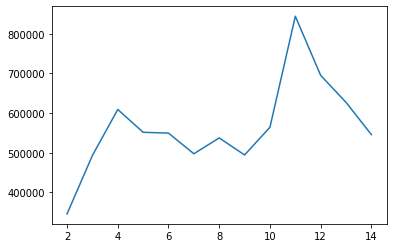

In [13]:

plt.plot(dtd.groupby(['week'])['total'].agg('max'))

In [14]:
# weekly max total

In [15]:
dtd.head(4)

,date,total,fd,sd,dt,week,daynum,weekday
0,2021-04-08,545511.0,96242.0,449269.0,2021-04-08,14,3,Thursday
1,2021-04-07,507926.0,99530.0,408396.0,2021-04-07,14,2,Wednesday
2,2021-04-06,272020.0,85227.0,186793.0,2021-04-06,14,1,Tuesday
3,2021-04-05,105334.0,40744.0,64590.0,2021-04-05,14,0,Monday


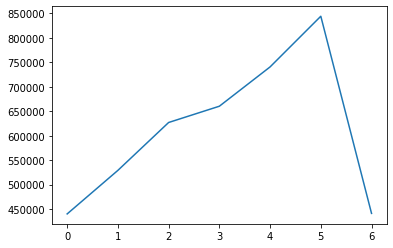

In [16]:
plt.plot(dtd.groupby(['daynum'])['total'].agg('max'))

In [17]:
df_daily_max = pd.DataFrame(dtd.groupby(['daynum'])['total'].agg('max')).reset_index()
df_daily_max.rename(columns={'total': 'day_max'}, inplace=True)
df_daily_max

,daynum,day_max
0,0,440051.0
1,1,529119.0
2,2,627008.0
3,3,660276.0
4,4,740655.0
5,5,844285.0
6,6,441142.0


In [18]:
dtd = pd.merge(dtd, df_daily_max, on='daynum')

In [19]:
dtd

,date,total,fd,sd,dt,week,daynum,weekday,day_max
0,2021-04-08,545511.0,96242.0,449269.0,2021-04-08,14,3,Thursday,660276.0
1,2021-04-01,616234.0,170818.0,445416.0,2021-04-01,13,3,Thursday,660276.0
2,2021-03-25,559324.0,324942.0,234382.0,2021-03-25,12,3,Thursday,660276.0
3,2021-03-18,660276.0,528260.0,132016.0,2021-03-18,11,3,Thursday,660276.0
4,2021-03-11,354372.0,260809.0,93563.0,2021-03-11,10,3,Thursday,660276.0
...,...,...,...,...,...,...,...,...,...
84,2021-02-12,549378.0,544603.0,4775.0,2021-02-12,6,4,Friday,740655.0
85,2021-02-05,498227.0,494163.0,4064.0,2021-02-05,5,4,Friday,740655.0
86,2021-01-29,489934.0,487756.0,2178.0,2021-01-29,4,4,Friday,740655.0
87,2021-01-22,480069.0,478248.0,1821.0,2021-01-22,3,4,Friday,740655.0


In [20]:
dtd_ts = dtd[['dt','total','day_max']]

In [21]:
dtd_ts

,dt,total,day_max
0,2021-04-08,545511.0,660276.0
1,2021-04-01,616234.0,660276.0
2,2021-03-25,559324.0,660276.0
3,2021-03-18,660276.0,660276.0
4,2021-03-11,354372.0,660276.0
...,...,...,...
84,2021-02-12,549378.0,740655.0
85,2021-02-05,498227.0,740655.0
86,2021-01-29,489934.0,740655.0
87,2021-01-22,480069.0,740655.0


In [22]:
# working with prophet

In [23]:

#from prophet 
import Prophet


ModuleNotFoundError: No module named 'Prophet'

In [ ]:
print("hello")

In [ ]:
dtd.head()

In [ ]:
dtd.dt[25].isocalendar()[1]

In [ ]:
https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newPeopleVaccinatedFirstDoseByPublishDate%22:%22newPeopleVaccinatedFirstDoseByPublishDate%22,%22cumPeopleVaccinatedFirstDoseByPublishDate%22:%22cumPeopleVaccinatedFirstDoseByPublishDate%22%7D&format=csv
                            